In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
# uncomment the line below only in Google Collab
#!pip install pandasql  
import pandasql as psql
pd.options.display.max_rows = 1000

# Data Try Coding

## Titanic Data

The data we will be using comes from the [Titanic Kaggle competition](https://www.kaggle.com/c/titanic/data). This dataset records key elements (including survival) from a sampling of passengers onboard the Titanic. Use the `Data Dictionary` section (from the link above) to get information about each column. The goal of this exercise is to use Dataframes and SQL to explore and manipulate the data to answer questions about passengers on the Titanic.

## Instructions

Upload this jupyter notebook to [google collab](https://colab.research.google.com/) and upload the `titanic.csv` dataset to to the `sample_data` folder. Run the top cell to make sure you are able to run all the packages required for this exercise.

## Load Data

##### 1. [Read](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) in the data (`titanic_data.csv`) as a dataframe, set it to a variable `data`, and get the [shape](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shape.html) of the dataframe. The shape shows the number of columns and rows.

Instructor Note: Getting the shape of the data helps get a sense of the size of the data you are working with. Large numbers could indicate that data processing may take time and may be difficult to work with on your local machine.

In [2]:
# change reference to '/content/sample_data/titanic_data.csv' when using Google Collab
data = pd.read_csv('titanic_data.csv')
data.shape

(891, 12)

In [3]:
assert data.shape[0] == 891
assert data.shape[1] == 12

##### 2. Display the first 10 rows of the dataset. Hint look at the [head](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html) function.

Instructor Note: Its always good to do visually inspect a few rows so you have a sense of what the data looks like. Often it can help bring to light columns with frequently null values for further exploration.

In [5]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## Summary Statistics

##### 1. Display the column data types and number of non-null records. (Hint: look at [info](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html) function).

Instructor Note: Its important to get a sense of the type of each column because categorical (object) types are treated differently than numerical types in analytics. Numerical types allow for descriptive statistics to be used while categorical data is not continuous and often under the hood gets split out into individual columns that represent each category.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


##### 2. Is there a column with a large proportion of null values? What percentage of that column has null values? [Round](https://www.w3schools.com/python/ref_func_round.asp) down to the nearest full percent. Set you value to a variable `percentage`.

Looking at Null values is important because it can indicate whether that column has any importance in the dataset. When the vast majority of values are null that indicates it may not be important OR should not taken into account in the analytics process.

In [7]:
cabin_nulls = 891 - 204
percentage = round((cabin_nulls / 891) * 100)
print("Percentage of Cabin column values that are null: %s%%" % percentage)

Percentage of Cabin column values that are null: 77%


In [8]:
assert percentage == 77

##### 3. Look at a summary of descriptive statistics which include count, mean, std, min, 25%, 50%, 75%, and max. (Hint look at the [describe](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html) function)

Instructor Note: This is key for understanding the spread and variation of all numerical columns. Look at this data in conjunction with the data dictionary.

In [9]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


##### 4. Are there any interesting observations from these descriptive statistics? Are there any columns missing from the dataset that are not in the descriptive statistics? Why?

- PassengerId is a unique identifier and should not contribute to whether a passenger survived.
- 38% of passengers survived.
- The majority of passengers traveled in pclass = 3 (third class, lowest class)
- 75% of passengers are 38 or youngers of which 50% are 28 or younger
- SibSp and Parch both show a very large spread. The vast majoirty of passengers do not have a sibling or spouse and a parent or child on board.
- There is a large spread in the fare which could correlate with the class of the passenger.

##### 5. Look at a summary of descriptive statistics for just male passengers.

In [10]:
query = """
select *
from data
where Sex = 'male'
"""
male_data = psql.sqldf(query)
male_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,577.000000,577.000000,577.000000,453.000000,577.000000,577.000000,577.000000
mean,454.147314,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893
std,257.486139,0.391775,0.813580,14.678201,1.061811,0.612294,43.138263
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,464.000000,0.000000,3.000000,29.000000,0.000000,0.000000,10.500000
75%,680.000000,0.000000,3.000000,39.000000,0.000000,0.000000,26.550000
max,891.000000,1.000000,3.000000,80.000000,8.000000,5.000000,512.329200


## Data Exploration

##### 1. Create a dataframe for the number of unique values for each column using SQL syntax. Set it to a variable `unique_columns`.

Instructor Note: This shows the number of distinct values. Sometimes it helps to reduce the variability by binning variables together. This can help narrow down columns that may be worth doing that for.

In [27]:
query = """
select 
    count(distinct PassengerId) as Count_PassengerId,
    count(distinct Survived) as Count_Survived,
    count(distinct Pclass) as Count_Pclass,
    count(distinct Name) as Count_Name, 
    count(distinct Sex) as Count_Sex,
    count(distinct Age) as Count_Age,
    count(distinct SibSp) as Count_SibSp,
    count(distinct Parch) as Count_Parch,
    count(distinct Ticket) as Count_Ticket,
    count(distinct Fare) as Count_Fare,
    count(distinct Cabin) as Count_Cabin,
    count(distinct Embarked) as Count_Embarked
from data
"""
unique_columns = psql.sqldf(query)
unique_columns

,Count_PassengerId,Count_Survived,Count_Pclass,Count_Name,Count_Sex,Count_Age,Count_SibSp,Count_Parch,Count_Ticket,Count_Fare,Count_Cabin,Count_Embarked
0,891,2,3,891,2,88,7,7,681,248,147,3


In [28]:
assert list(unique_columns['Count_PassengerId'])[0] == 891
assert list(unique_columns['Count_Survived'])[0] == 2
assert list(unique_columns['Count_Pclass'])[0] == 3
assert list(unique_columns['Count_Name'])[0] == 891
assert list(unique_columns['Count_Sex'])[0] == 2
assert list(unique_columns['Count_Age'])[0] == 88
assert list(unique_columns['Count_SibSp'])[0] == 7
assert list(unique_columns['Count_Parch'])[0] == 7
assert list(unique_columns['Count_Ticket'])[0] == 681
assert list(unique_columns['Count_Fare'])[0] == 248
assert list(unique_columns['Count_Cabin'])[0] == 147
assert list(unique_columns['Count_Embarked'])[0] == 3

##### 2. Do these unique values confirm any of your observations from the descriptive statistics in the section above?

Its is clear the PassengerId is a unique identifier that uniquely labels the row but does not contribute to prediction. In addition, Name and Ticket also seem to be representative of the record due to their high degree of uniqueness.

##### 3. How many of the passengers are male? How many are female? Create a single dataframe using SQL syntax and set it to a variable `gender_breakdown`.

In [29]:
query = """
select
    Sex,
    count(distinct PassengerId) as Count_PassengerId
from data
group by Sex
"""
gender_breakdown = psql.sqldf(query)
gender_breakdown

,Sex,Count_PassengerId
0,female,314
1,male,577


In [30]:
assert list(gender_breakdown.loc[gender_breakdown['Sex'] == 'female']['Count_PassengerId'])[0] == 314
assert list(gender_breakdown.loc[gender_breakdown['Sex'] == 'male']['Count_PassengerId'])[0] == 577

##### 4. How many male passengers survived? How many female passengers survived? Create a single dataframe that answers both questions and set it to a variable `gender_survival`.

In [31]:
query = """
select
    Sex,
    Survived,
    count(distinct PassengerId) as Count_PassengerId
from data
group by Sex, Survived
"""
gender_survival = psql.sqldf(query)
gender_survival

,Sex,Survived,Count_PassengerId
0,female,0,81
1,female,1,233
2,male,0,468
3,male,1,109


In [32]:
female_dead = sorted(list(gender_survival.loc[(gender_survival['Sex'] == 'female')]['Count_PassengerId']))[0]
female_survived = sorted(list(gender_survival.loc[(gender_survival['Sex'] == 'female')]['Count_PassengerId']))[1]
male_dead = sorted(list(gender_survival.loc[(gender_survival['Sex'] == 'male')]['Count_PassengerId']))[1]
male_survived = sorted(list(gender_survival.loc[(gender_survival['Sex'] == 'male')]['Count_PassengerId']))[0]

assert female_dead == 81
assert female_survived == 233
assert male_dead == 468
assert male_survived == 109

##### 5. Create a [bar graph](https://seaborn.pydata.org/generated/seaborn.barplot.html) to show the gender survival breakdown calculated above. Feel free to play with the color schemes and other customizable options.

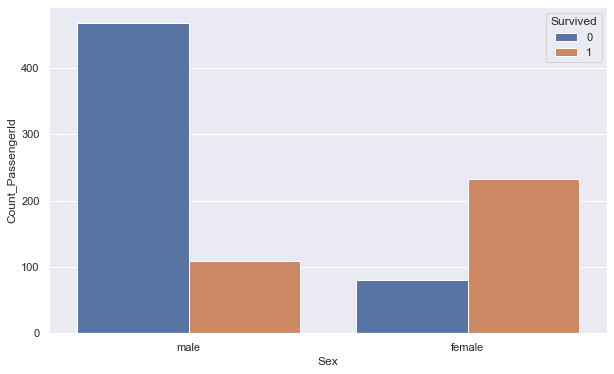

In [33]:
plot = sns.barplot(x = 'Sex', y = 'Count_PassengerId', hue = 'Survived', data = gender_survival, order = ['male', 'female'])

##### 6. Add a column called `age_group` to `data` that breaks down the passenger ages according to the rules below. Set this new dataframe to a variable `data_with_age_grouping`.
- when Age is null then 'unknown'
- when Age < 1 then 'under 1'
- when Age < 5 then 'under 5'
- when Age < 18 then 'under 18'
- when Age < 24 then 'under 24'
- when Age < 44 then 'under 44'
- when Age < 65 then 'under 65'
- when Age >= 65 then 'over 65'

In [34]:
query = """
select
    *,
    case
      when Age is null then 'unknown'
      when Age < 1 then 'under 1'
      when Age < 5 then 'under 5'
      when Age < 18 then 'under 18'
      when Age < 24 then 'under 24'
      when Age < 44 then 'under 44'
      when Age < 65 then 'under 65'
      else 'over 65'
    end as age_group
from data
"""
data_with_age_grouping = psql.sqldf(query)
data_with_age_grouping.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,None,S,under 24
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,under 44
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,None,S,under 44
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,under 44
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,None,S,under 44


In [35]:
passenger_6 = list(data_with_age_grouping.loc[data_with_age_grouping['PassengerId'] == 6]['age_group'])[0]
passenger_832 = list(data_with_age_grouping.loc[data_with_age_grouping['PassengerId'] == 832]['age_group'])[0]
passenger_828 = list(data_with_age_grouping.loc[data_with_age_grouping['PassengerId'] == 828]['age_group'])[0]
passenger_831 = list(data_with_age_grouping.loc[data_with_age_grouping['PassengerId'] == 831]['age_group'])[0]
passenger_834 = list(data_with_age_grouping.loc[data_with_age_grouping['PassengerId'] == 834]['age_group'])[0]
passenger_823 = list(data_with_age_grouping.loc[data_with_age_grouping['PassengerId'] == 823]['age_group'])[0]
passenger_821 = list(data_with_age_grouping.loc[data_with_age_grouping['PassengerId'] == 821]['age_group'])[0]
passenger_631 = list(data_with_age_grouping.loc[data_with_age_grouping['PassengerId'] == 631]['age_group'])[0]

assert passenger_6 == 'unknown'
assert passenger_832 == 'under 1'
assert passenger_828 == 'under 5'
assert passenger_831 == 'under 18'
assert passenger_834 == 'under 24'
assert passenger_823 == 'under 44'
assert passenger_821 == 'under 65'
assert passenger_631 == 'over 65'

##### 7. Create a [plot](https://seaborn.pydata.org/generated/seaborn.countplot.html#seaborn.countplot) that visualizes the number of passengers in each respective age_group. Feel free to play with the color schemes and other customizable options.

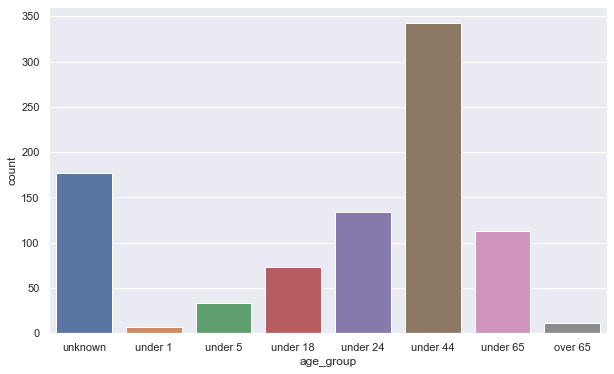

In [36]:
sns.set_theme(style = 'darkgrid')
sns.set(rc={'figure.figsize':(10,6)})
g = sns.countplot(x = "age_group", data = data_with_age_grouping, order=('unknown','under 1', 'under 5', 'under 18', 'under 24', 'under 44', 'under 65', 'over 65'))

##### 8. Create a dataframe that answers: Within each age_group how many passengers survived and died? What was their average fare? Set this dataframe to a variable `age_grouping_aggregation`.

In [37]:
query = """
select age_group, Survived, count(distinct PassengerId) as Count_PassengerId, avg(Fare) as Average_Fare
from data_with_age_grouping
group by 1, 2
order by 1, 2
"""
age_grouping_aggregation = psql.sqldf(query)
age_grouping_aggregation

,age_group,Survived,Count_PassengerId,Average_Fare
0,over 65,0,10,28.796260
1,over 65,1,1,30.000000
2,under 1,1,7,37.261900
3,under 18,0,39,22.938892
4,under 18,1,34,39.322674
5,under 24,0,92,18.296646
6,under 24,1,42,51.501490
7,under 44,0,202,20.056164
8,under 44,1,141,57.124084
9,under 5,0,13,39.002885


In [38]:
# We will test the results using a couple age groups
under_18_passenger_counts = sorted(list(age_grouping_aggregation.loc[age_grouping_aggregation['age_group'] == 'under 18']['Count_PassengerId']))
under_18_passenger_avg_fares = sorted(list(age_grouping_aggregation.loc[age_grouping_aggregation['age_group'] == 'under 18']['Average_Fare']))
over_65_passenger_counts = sorted(list(age_grouping_aggregation.loc[age_grouping_aggregation['age_group'] == 'over 65']['Count_PassengerId']))

assert under_18_passenger_counts == [34, 39]
assert under_18_passenger_avg_fares == [22.938892307692306, 39.32267352941175]
assert over_65_passenger_counts == [1, 10]

## Optional Challenge

##### Did the port (`Embarked` column) the passengers embarked from make a difference in their survival? Provide a percentage of passengers that survived from `Embarked` C.

In [47]:
query = """
select Embarked, Survived, count(distinct PassengerId) as Count_PassengerId
from data_with_age_grouping
where Embarked is not null
group by 1, 2
order by 1, 2
"""
embarked_survival = psql.sqldf(query)
embarked_survival

,Embarked,Survived,Count_PassengerId
0,C,0,75
1,C,1,93
2,Q,0,47
3,Q,1,30
4,S,0,427
5,S,1,217


In [48]:
percent = round((93/(75 + 93)) * 100)
print("Percentage of Passenger that surived from Embarked C: %s%%" % percent)

Percentage of Passenger that surived from Embarked C: 55%


##### What slice of data do you think had the highest survival rate? Provide a percentage of survival for that slice. For ex. passengers that were `pClass` 3, females, over 65 could be an interesting subset of the data.

In [49]:
# add code here

##### Are there any other columns you would like to create by using data in other columns (similar to what we did with age groupings)? If so, add this new column on to the dataset.

In [50]:
# add code here